# 数据结构基础

>- 用Python操作表；
- 用Python操作栈；
- 用Python操作队列；
- 用Python操作树；
- 用Python操作图；
- 用Python进行查找；
- 用Python进行排列；

## 表、栈和队列
### 用列表来创建表

In [5]:
myList = list()
myList.append(10)
myList

[10]

### 自定义栈数据结构

In [1]:
class PyStack:
    def __init__(self, size=20):  #堆栈类
        self.stack = []  #创建一个列表
        self.size = size
        self.top = -1  #栈顶位置

    def setSize(self, size):
        self.size = size

    def push(self, element):
        if self.isFull():
            raise StackException("PyStackOverflow")  #如果栈满则引发异常
        else:
            self.stack.append(element)
            self.top = self.top + 1

    def pop(self):
        if self.isEmpty():
            raise StackException('PyStackUndderflow')  # 如果栈为空则引发异常
        else:
            element = self.stack[-1]
            self.top = self.top - 1
            del self.stack[-1]
            return element

    def Top(self):
        return self.top  # 清空栈

    def empty(self):
        self.stack = []
        self.top = -1

    def isEmpty(self):
        if self.top == -1:
            return True
        else:
            return False

    def isFull(self):
        if self.top == self.size - 1:
            return True
        else:
            return False

    class StackException(Exception):  #自定义异类
        def __init__(self, data):
            self.data = data

        def __str__(self):
            return self.data

In [2]:
class StackException(Exception):
    def __init__(self, value):
        self.value = value

    def __str__(self):
        return self.value

In [3]:
stack = PyStack()
for i in range(10):
    stack.push(i)

print("top element: ", stack.Top())

for i in range(10):
    print(stack.pop())

print("isEmpty():", stack.isEmpty())
for i in range(21):
    stack.push(i)

top element:  9
9
8
7
6
5
4
3
2
1
0
isEmpty(): True


StackException: PyStackOverflow

### 实现队列功能

In [36]:
class PyQueue:
    def __init__(self, size=20):
        self.queue = []
        self.size = size
        self.end = -1

    def setSize(self, size):
        self.size = size

    def Push(self, element):
        if self.end < self.size - 1:
            self.queue.append(element)
            self.end = self.end + 1
        else:
            raise QueueException("PyQueueFull")  #如果栈满则引发异常

    def Pop(self):
        if self.end != -1:
            element = self.queue[0]
            self.queue = self.queue[1:]
            self.end = self.end - 1
            return element
        else:
            raise QueueEception("PyQueueEmpty")

    def getEnd(self):
        return self.end

    def Empty(self):
        self.queue = []
        self.end = -1


class QueueEception(Exception):
    def __init__(self, data):
        self.data = data

    def __str__(self):
        return self.data

In [37]:
queue = PyQueue()
for i in range(10):
    queue.Push(i)

print("the end is :", queue.getEnd())

for i in range(10):
    print(queue.Pop())

queue.Empty()

for i in range(10):
    print(queue.Pop())

the end is : 9
0
1
2
3
4
5
6
7
8
9


QueueEception: PyQueueEmpty

## 树和图
### 用列表构建树

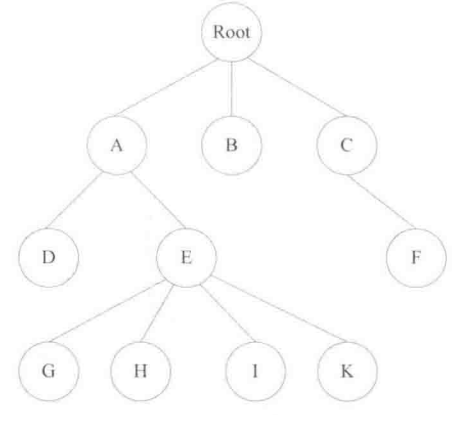

In [42]:
G = ['G', []]
H = ['H', []]
I = ['I', []]
K = ['K', []]
E = ['E', [G, H, I, K]]

D = ['D', []]
A = ['A', [D, E]]

B = ['B', []]

F = ['F', []]
C = ['C', [F]]

root = ['root', [A, B, C]]

print(root)

['root', [['A', [['D', []], ['E', [['G', []], ['H', []], ['I', []], ['K', []]]]]], ['B', []], ['C', [['F', []]]]]]


### 实现二叉树类与遍历二叉树

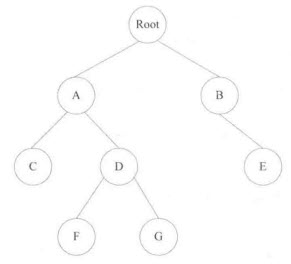

In [47]:
class BTree:
    def __init__(self, value):
        self.left = None
        self.data = value
        self.right = None

    def insertLeft(self, value):
        self.left = BTree(value)
        return self.left

    def insertRight(self, value):
        self.right = BTree(value)
        return self.right

    def show(self):
        print(self.data)


def PreOrder(node):
    if node == None:
        return
    else:
        PreOrder(node.left)
        node.show()
        PreOrder(node.right)


Root = BTree('root')

A = Root.insertLeft('A')
C = A.insertLeft('C')
D = A.insertRight('D')
F = D.insertLeft('F')
G = D.insertRight('G')

B = Root.insertRight('B')
E = B.insertRight('E')

PreOrder(Root)

C
A
F
D
G
root
B
E


### 用字典构建搜索图

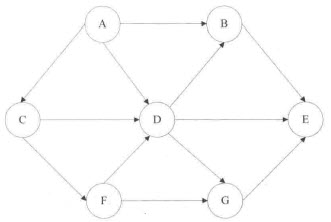

In [50]:
def searchGraph(graph, start, end):
    results = []
    generatePath(graph, [start], end, results)  #生成路径
    results.sort(key=lambda x: len(x))  #按路径长短排序
    return results


def generatePath(graph, path, end, results):  #生成路径
    state = path[-1]
    if state == end:
        results.append(path)
    else:
        for arc in graph[state]:
            if arc not in path:
                generatePath(graph, path + [arc], end, results)


Graph = {
    'A': ['B', 'C', 'D'],
    'B': ['E'],
    'C': ['D', 'F'],
    'D': ['B', 'E', 'G'],
    'E': [],
    'F': ['D', 'G'],
    'G': ['E']
}
r = searchGraph(Graph, 'A', 'D')  #搜索A到D的所有路径
print('----path from A to D---------')
for i in r:
    print(i)

r = searchGraph(Graph, 'A', 'E')
print('----path from A to E---------')
for i in r:
    print(i)

r = searchGraph(Graph, 'C', 'E')
print('----path from C to E---------')
for i in r:
    print(i)

----path from A to D---------
['A', 'D']
['A', 'C', 'D']
['A', 'C', 'F', 'D']
----path from A to E---------
['A', 'B', 'E']
['A', 'D', 'E']
['A', 'C', 'D', 'E']
['A', 'D', 'B', 'E']
['A', 'D', 'G', 'E']
['A', 'C', 'D', 'B', 'E']
['A', 'C', 'D', 'G', 'E']
['A', 'C', 'F', 'D', 'E']
['A', 'C', 'F', 'G', 'E']
['A', 'C', 'F', 'D', 'B', 'E']
['A', 'C', 'F', 'D', 'G', 'E']
----path from C to E---------
['C', 'D', 'E']
['C', 'D', 'B', 'E']
['C', 'D', 'G', 'E']
['C', 'F', 'D', 'E']
['C', 'F', 'G', 'E']
['C', 'F', 'D', 'B', 'E']
['C', 'F', 'D', 'G', 'E']


## 查找与排序
### 实现二分查找

In [65]:
def BinarySearch(data, key):
    low = 0
    high = len(data) - 1
    i = 0
    while (low <= high):
        i = i + 1
        mid = (low + high) // 2  #向下取整除法
        if (data[mid] < key):
            low = mid + 1
        elif (data[mid] > key):
            high = mid - 1
        else:
            print("use %d time(s)" % i)
            return mid
    print("use %d time(s)" % i)
    return -1

In [66]:
data = [1, 5, 6, 9, 10, 51, 62, 65, 70]
print(BinarySearch(data, 5))
print(BinarySearch(data, 10))
print(BinarySearch(data, 20))

use 2 time(s)
1
use 1 time(s)
4
use 3 time(s)
-1


### 用二叉树排序

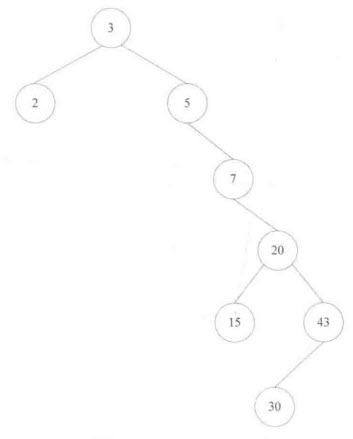

In [73]:
class BTree:
    def __init__(self, value):
        self.left = None
        self.data = value
        self.right = None

    def insertLeft(self, value):
        self.left = BTree(value)
        return self.left

    def insertRight(self, value):
        self.right = BTree(value)

    def show(self):
        print(self.data)


def inorder(node):
    if node.data:
        if node.left:
            inorder(node.left)
        node.show()
        if node.right:
            inorder(node.right)


def riorder(node):
    if node.data:
        if node.right:
            riorder(node.right)
        node.show()
        if node.left:
            riorder(node.left)


def insert(node, value):
    if value > node.data:
        if node.right:
            insert(node.right, value)
        else:
            node.insertRight(value)
    else:
        if node.left:
            insert(node.left, value)
        else:
            node.insertLeft(value)

In [74]:
data = [3, 5, 7, 20, 43, 2, 15, 30]
Root = BTree(data[0])
for i in range(1, len(data)):
    insert(Root, data[i])
print("sorting from low to high")
inorder(Root)
print("sorting from high to low")
riorder(Root)

sorting from low to high
2
3
5
7
15
20
30
43
sorting from high to low
43
30
20
15
7
5
3
2
